<a href="https://colab.research.google.com/github/craine/AIND-Sudoku/blob/master/Fastai_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai2

In [2]:
!pip install utils

In [0]:
from fastai2.vision.all import *
from utils import *
#from fastai2 import *

matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [0]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [7]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [8]:
# sorted sorts them in order
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [9]:
#first in the threes array
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [10]:
# numpy array view of the image
array(im3)[2:10,3:10]

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  29],
       [  0,   0,   0,   0,  48, 166, 224],
       [  0,   0,  93, 244, 249, 253, 187],
       [  0,   0, 107, 253, 253, 230,  48],
       [  0,   0,   3,  20,  20,  15,   0]], dtype=uint8)

In [11]:
#hello image nice to see you
print(array(im3))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  29 150 195 254 255 254 176 193 150
   96   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  48 166 224 253 253 234 196 253 253 253 253
  233   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  93 244 249 253 187  46  10   8   4  10 194 253 253
  233   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 107 253 253 230  48   0   0   0   0   0 19

In [12]:
print(tensor(im3))

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255,
         254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  4

In [13]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [0]:
im3_t = tensor(im3)

In [0]:
df = pd.DataFrame(im3_t[4:15,4:22])

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0


In [17]:
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [18]:
#this shows me how many are in the list of images
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

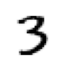

In [19]:
show_image(three_tensors[1])

In [20]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

we have 6131 images, each of size 28 x 28 pixels

In [21]:
len(stacked_threes.shape)

3

The length of a tensor's shape is its rank.

The number of dimensions used to represent the data is known as its Rank.

rank is the number of axes or dimensions in a tensor; 

shape is the size of each axis of a tensor.

In [22]:
#get the tensor's rank with ndim
stacked_threes.ndim

3

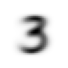

In [23]:
mean_threes = stacked_threes.mean(0)
show_image(mean_threes);

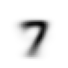

In [24]:
mean_sevens = stacked_sevens.mean(0)
show_image(mean_sevens);

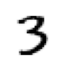

In [25]:
a_3 = stacked_threes[1]
show_image(a_3);

Because some differences will be positive, some will be negative, and these differences cancel out, resulting in a situation where an image which is too dark in some places and too light in others might be shown as having zero total differences from the ideal. That would be misleading!

To avoid this, there's two main ways data scientists **measure distance** in this context:

1. Take the mean of the absolute value of differences (absolute value is the function that replaces negative values with positive values). This is called the mean absolute difference or L1 norm

2. Take the mean of the square of differences (which makes everything positive) and then take the square root (which undoes the squaring). This is called the root mean squared error (RMSE) or L2 norm.

In [26]:
dist_3_abs = (a_3 - mean_threes).abs().mean()
dist_3_sqr = ((a_3 - mean_threes)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [27]:
dist_7_abs = (a_3 - mean_sevens).abs().mean()
dist_7_sqr = ((a_3 - mean_sevens)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

Why do we do the a_3 vs. the sevens? To show the differences.

"In both cases, the distance between our 3 and the "ideal" 3 is less than the distance to the ideal 7."

In [28]:
F.l1_loss(a_3.float(),mean_sevens), F.mse_loss(a_3,mean_sevens).sqrt()

(tensor(0.1586), tensor(0.3021))

What is going on ^ here?

L1 loss is just equal to (a-b).abs().mean(), where a and b are tensors. 

In [29]:
valid_3_tensor = torch.stack([tensor(Image.open(o))
                              for o in (path/'valid'/'3').ls()])
valid_3_tensor = valid_3_tensor.float()/255
valid_3_tensor.shape

torch.Size([1010, 28, 28])

The division by 255 is applied to convert RGB pixel values which are usually in the range [0, 255] to [0.0, 1.0] range. Please see torchvision.transforms.ToTensor for more information


The reason they are in [0, 255] is because true color images have 256 values (8-bit) for each channel. It's common to normalize this to [0, 1] as the input to a neural network.

In our case, it is also necessary because we're using a pretrained ResNet from torchvision that has been trained on images with values in [0, 1] and therefore expects the same format.

In [30]:
valid_7_tensor = torch.stack([tensor(Image.open(o))
                              for o in (path/'valid'/'7').ls()])
valid_7_tensor = valid_7_tensor.float()/255
valid_7_tensor.shape

torch.Size([1028, 28, 28])

In [31]:
def mnist_distance(a,b):
  return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean_threes)

tensor(0.1114)

What is going on here?

This is a function that calculates the mean absolute error. 

Tthe subtraction (a-b) is from PyTorch, when it tries to perform a simple operation subtraction between two tensors of different ranks, will use broadcasting. Broadcasting is a feature where PyTorch will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank. Broadcasting is an important capability that makes tensor code much easier to write.

Finally, our function calls mean((-1,-2)). The tuple (-1,-2) represents a range of axes. In Python, -1 refers to the last element, and -2 refers to the second last. So in this case, this tells PyTorch that we want to take the mean ranging over the values indexed by the last two axes of the tensor. The last two axes are the horizontal and vertical dimensions of an image. So after taking the mean over the last two axes, we are left with just the first tensor axis, which indexes over our images, which is why our final size was (1010). In other words, for every image, we averaged the intensity of all the pixels in that image.

In [32]:
valid_3_distance = mnist_distance(valid_3_tensor, mean_threes)
valid_3_distance, valid_3_distance.shape

(tensor([0.1086, 0.1058, 0.1445,  ..., 0.1125, 0.1133, 0.1137]),
 torch.Size([1010]))

So in this case, PyTorch treats mean3, a rank 2 tensor representing a single image, as if it was 1010 copies of the same image, and then subtracts each of those copies from each "three" in our validation set. 

In [33]:
tensor([1,2,3]) + tensor([1,1,1])

tensor([2, 3, 4])

In [34]:
(valid_3_tensor-mean_threes).shape

torch.Size([1010, 28, 28])

This is the difference between the "ideal 3" and each of 1,010 threes in the validation set which contains 28x28 images, resulting in the shape 1010,28,28.

In [0]:
def is_3(x): return mnist_distance(x,mean_threes) < mnist_distance(x, mean_sevens)

In [36]:
#Note also that when we convert the boolean response to a float, 
#we get a 1.0 for true and 0.0 for false:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [37]:
is_3(valid_3_tensor)

tensor([True, True, True,  ..., True, True, True])

calculate the accuracy for each of threes and sevens, by taking the average of that function for all threes, and it's inverse for all sevens

In [38]:
accuracy_3s = is_3(valid_3_tensor).float().mean()
accuracy_3s

tensor(0.9168)

In [39]:
# 1 - is_3s to get the accuracy not the incorrect percentage
accuracy_7s = (1 - is_3(valid_7_tensor).float()).mean()
accuracy_7s

tensor(0.9854)

In [40]:
#get the average accuracy
(accuracy_3s+accuracy_7s)/2

tensor(0.9511)